**Code Alpha Internship Programme 1st Task Stock Price Prediction using LSTM Model**

**Data Science**<Br>
**Task 2: Stock Prediction**

**Purpose** <Br>
The purpose of this project is to develop a predictive model using Long Short-Term Memory (LSTM) neural networks to forecast the stock prices of Alphabet Inc (Google). By Using historical stock price data, the project aims to explore the potential of deep learning techniques in capturing complex patterns and trends in the stock market

**Objective**<Br>
Implement an LSTM neural network model to predict the stock prices of Alphabet Inc (Google) based on historical data.<Br>
Preprocessing, Training and Testing data to evaluate the model's performance. <Br>
Visualize the predicted stock prices alongside the actual prices to assess the model's accuracy visually.<Br>


**Dataset Name:** Historical Price of Alphabet Inc (Google)  <Br>
**Description:** This dataset contains historical daily stock price data for Alphabet Inc (Google) spanning from March 27, 2014, to March 31, 2024. The dataset includes various attributes such as date, opening price, closing price, high price, low price, and trading volume for each trading day during the specified time range. The data is sourced from [mention the source, such as Yahoo Finance or another data provider]. This dataset serves as the foundation for building and training predictive models to forecast future stock prices using machine learning techniques."

**Importing Libraries:** 
Importing necessary libraries like NumPy, Pandas, Matplotlib, Seaborn, and Keras for data manipulation, visualization, and building the LSTM model.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import seaborn as sns


**Load the Dataset:** We load the stock price dataset, presumably containing historical stock prices of a particular stock, such as Alphabet Inc.

In [27]:
# Load the dataset
df = pd.read_csv('Google_Stock.csv')

# Display the rows of the dataset
print("Initial dataset:")
print(df.head())

Initial dataset:
         Date       Open       High        Low      Close  Adj Close   Volume
0  2014-03-27  28.322241  28.322241  27.570307  27.846546  27.846546   262719
1  2014-03-28  27.983171  28.243956  27.857019  27.922838  27.922838   824257
2  2014-03-31  28.266893  28.272379  27.770258  27.772251  27.772251   216593
3  2014-04-01  27.859013  28.344681  27.859013  28.280355  28.280355   158434
4  2014-04-02  29.917362  30.158699  28.032537  28.272379  28.272379  2942055


**Missing Values :** Checking for any missing values

In [28]:
# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


**Data Preprocessing:** We preprocess the data by converting the 'Date' column to a datetime format and setting it as the index.

In [29]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

**Histogram:** We are plotting histogram

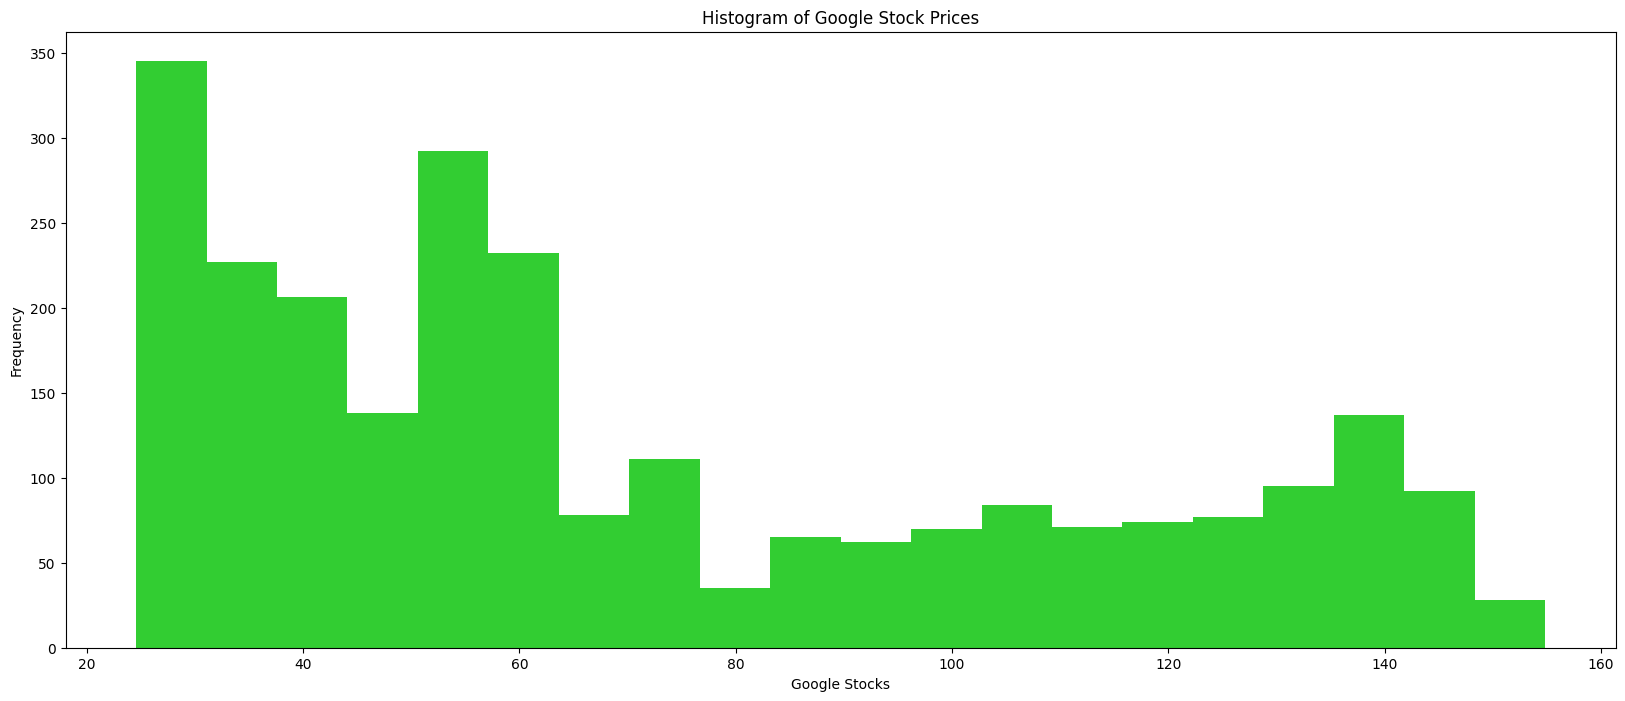

In [30]:
plt.figure(figsize=(20, 8))
plt.hist(df['Adj Close'], bins=20, color='LimeGreen')
plt.title('Histogram of Google Stock Prices')
plt.xlabel('Google Stocks')
plt.ylabel('Frequency')
plt.show()

**TIme Series Trend:** 

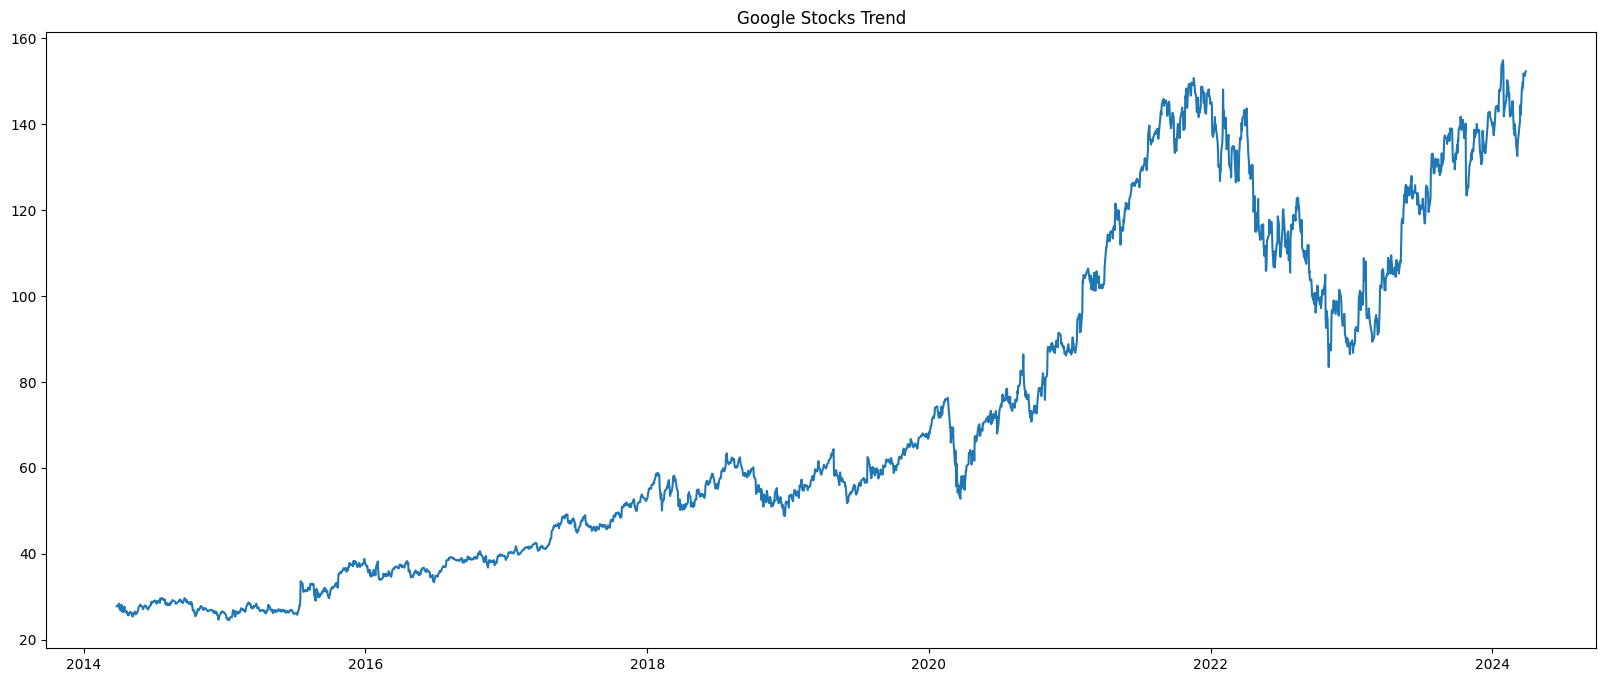

In [31]:
plt.figure(figsize=(20, 8))
plt.plot(df['Adj Close'])
plt.title('Google Stocks Trend')
plt.show()

**Feature Scaling:** We scale the 'Close' prices using MinMaxScaler to normalize the data, which is a common preprocessing step for neural network-based models.

In [8]:
closing_prices = df.filter(['Close']).values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

**Training Dataset:** We split the dataset into training and testing sets, and create sequences of data with 60 time steps for training the LSTM model.

In [9]:
train_data = scaled_prices[:int(len(scaled_prices) * 0.95), :]
train_features, train_labels = [], []

for i in range(60, len(train_data)):
    train_features.append(train_data[i-60:i, 0])
    train_labels.append(train_data[i, 0])

train_features, train_labels = np.array(train_features), np.array(train_labels)
train_features = np.reshape(train_features, (train_features.shape[0], train_features.shape[1], 1))


**Building the LSTM Model:** We construct a Sequential model with three LSTM layers and a Dense output layer.

In [10]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_features.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))


C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compiling the Model:** We compile the model with the Adam optimizer and mean squared error loss function.

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

**Fit the Model to Training Data:** We train the LSTM model using the training features and labels.

In [12]:
model.fit(train_features, train_labels, epochs=25, batch_size=32)

Epoch 1/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - loss: 0.0441
Epoch 2/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - loss: 8.5736e-04
Epoch 3/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 8.3016e-04
Epoch 4/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 7.8537e-04
Epoch 5/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 8.7460e-04
Epoch 6/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 6.5492e-04
Epoch 7/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 6.4528e-04
Epoch 8/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - loss: 5.8571e-04
Epoch 9/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 5.9052e-04
Epoch 10/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 6.4106e-04
Epoch 11/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 4.6688e-04
Epoch 12/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 4.5154e-04
Epoch 13/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 5.3033e-04
Epoch 14/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 4.5568e-04
Epoch 15/25
7

**Prepare Testing Data:** We prepare the testing data by creating sequences of data with 60 time steps for testing the LSTM model.

In [17]:
# Create the testing dataset
test_data = scaled_prices[int(len(scaled_prices) * 0.95) - 60:, :]
x_test, y_test = [], closing_prices[int(len(closing_prices) * 0.95):, :]

# Prepare testing data
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

**Make Predictions:** We use the trained LSTM model to make predictions on the testing data.

In [18]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [19]:
training_set = df.iloc[:int(len(closing_prices) * 0.95)]
validation_set = df.iloc[int(len(closing_prices) * 0.95):]
validation_set.loc[:, 'Predictions'] = predictions.copy()

C:\Users\prath\AppData\Local\Temp\ipykernel_4556\3477981132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_set.loc[:, 'Predictions'] = predictions.copy()


**Visualizing Predictions:** We plot the actual and predicted stock prices for visualization.

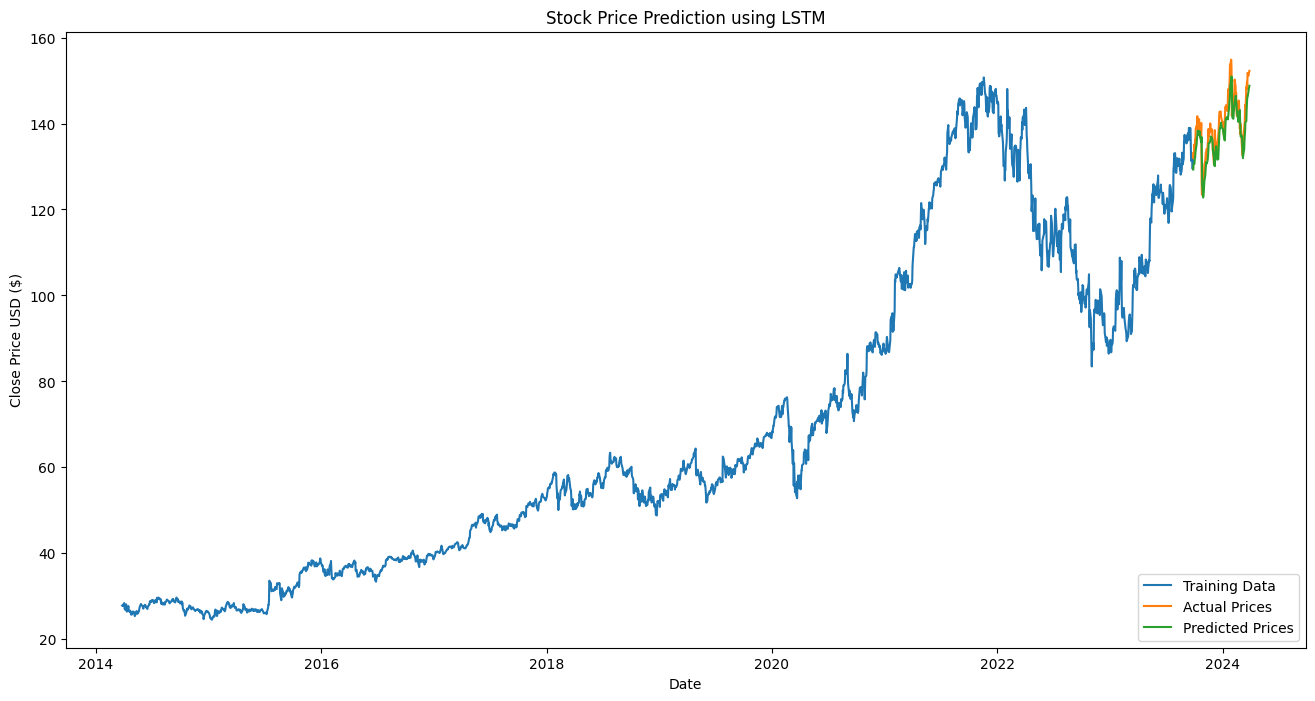

In [20]:
# Visualize the predicted prices compared to actual prices
plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(training_set['Close'], label='Training Data')
plt.plot(validation_set[['Close', 'Predictions']], label=['Actual Prices', 'Predicted Prices'])
plt.legend(loc='lower right')
plt.show()

**Model Evaluation Metrics:** We calculate the Mean Squared Error (MSE) as a metric to evaluate the performance of the LSTM model.

In [21]:
mse_lstm = mean_squared_error(df['Close'][-len(predictions):], predictions)
print('\nLSTM Model Evaluation:')
print(f'MSE: {mse_lstm:.2f}')


LSTM Model Evaluation:
MSE: 13.33
